In [ ]:
# FASE 1: PREPARACI√ìN DE LOS DATOS

In [21]:
## 1. Carga de librer√≠as

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Estilos de visualizaci√≥n
sns.set(style="whitegrid")

In [23]:
## 2. Carga del dataset

In [24]:
ruta_temp = "../data/raw/global_temperature.csv"
df_temp = pd.read_csv(ruta_temp, skiprows=4)  # puede variar seg√∫n el archivo exacto
df_temp.head()

Year  Anomaly
0  1850    -0.08
1  1851    -0.14
2  1852     0.11
3  1853     0.01
4  1854    -0.06

In [25]:
ruta_co2 = "../data/raw/co2_monthly.csv"

# Leer el archivo saltando los comentarios iniciales (#)
df_co2 = pd.read_csv(ruta_co2, comment='#')

# Revisar los nombres autom√°ticos de columnas
print(df_co2.columns)
df_co2.head()


Index(['year', 'month', 'decimal date', 'average', 'deseasonalized', 'ndays',
       'sdev', 'unc'],
      dtype='object')


year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99

In [ ]:
# 1. Crear columna fecha como antes
df_co2["date"] = pd.to_datetime(df_co2["year"].astype(str) + "-" + df_co2["month"].astype(str), errors='coerce')

# 2. Reordenar columnas para tener 'date' al final
cols = [col for col in df_co2.columns if col != "date"] + ["date"]
df_co2 = df_co2[cols]

# 3. Establecer 'date' como √≠ndice
df_co2.set_index("date", inplace=True)

# 4. Visualizar
print(df_co2.columns)
df_co2.head()



Index(['index', 'year', 'month', 'decimal date', 'average', 'deseasonalized',
       'ndays', 'sdev', 'unc'],
      dtype='object')


index  year  month  decimal date  average  deseasonalized  ndays  \
date                                                                           
1958-03-01      0  1958      3     1958.2027   315.71          314.44     -1   
1958-04-01      1  1958      4     1958.2877   317.45          315.16     -1   
1958-05-01      2  1958      5     1958.3699   317.51          314.69     -1   
1958-06-01      3  1958      6     1958.4548   317.27          315.15     -1   
1958-07-01      4  1958      7     1958.5370   315.87          315.20     -1   

            sdev   unc  
date                    
1958-03-01 -9.99 -0.99  
1958-04-01 -9.99 -0.99  
1958-05-01 -9.99 -0.99  
1958-06-01 -9.99 -0.99  
1958-07-01 -9.99 -0.99

In [63]:
#Guardar versi√≥n limpia del dataset
df_temp.to_csv("../data/clean/global_temperature_clean.csv", index=False)
df_co2 = df_co2.reset_index(names="date") #esto es para que la fecha no sea el √≠ndice al guardar
df_co2.to_csv("../data/clean/co2_clean.csv", index=False) #guardar el dataset limpio con 'date' visible

In [64]:
print(df_temp.head())
print(df_co2.head())

print(df_temp.info())
print(df_co2.info())


   Year  Anomaly
0  1850    -0.08
1  1851    -0.14
2  1852     0.11
3  1853     0.01
4  1854    -0.06
        date  index  year  month  decimal date  average  deseasonalized  \
0 1958-03-01      0  1958      3     1958.2027   315.71          314.44   
1 1958-04-01      1  1958      4     1958.2877   317.45          315.16   
2 1958-05-01      2  1958      5     1958.3699   317.51          314.69   
3 1958-06-01      3  1958      6     1958.4548   317.27          315.15   
4 1958-07-01      4  1958      7     1958.5370   315.87          315.20   

   ndays  sdev   unc  
0     -1 -9.99 -0.99  
1     -1 -9.99 -0.99  
2     -1 -9.99 -0.99  
3     -1 -9.99 -0.99  
4     -1 -9.99 -0.99  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     176 non-null    int64  
 1   Anomaly  176 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB
Non

In [65]:
df_co2 = pd.read_csv("../data/clean/co2_clean.csv")
df_co2["date"] = pd.to_datetime(df_co2["date"])
df_co2.set_index("date", inplace=True)


In [ ]:
# FASE 2: RECOLECCI√ìN Y EXPLORACI√ìN DE DATOS (EDA)

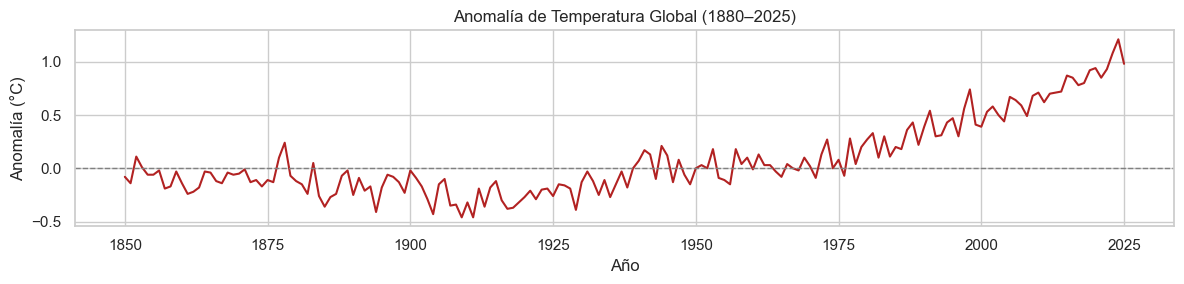

In [68]:
plt.figure(figsize=(12, 3))
sns.lineplot(data=df_temp, x="Year", y="Anomaly", color='firebrick')
plt.title("Anomal√≠a de Temperatura Global (1880‚Äì2025)")
plt.xlabel("A√±o")
plt.ylabel("Anomal√≠a (¬∞C)")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


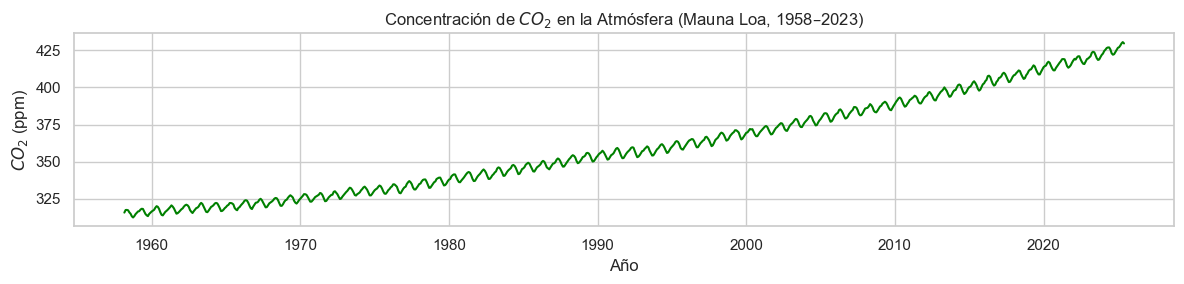

In [71]:
plt.figure(figsize=(12, 3))
sns.lineplot(data=df_co2, x=df_co2.index, y="average", color='green')
plt.title("Concentraci√≥n de $CO_2$ en la Atm√≥sfera (Mauna Loa, 1958‚Äì2023)")
plt.xlabel("A√±o")
plt.ylabel("$CO_2$ (ppm)")
plt.grid(True)
plt.tight_layout()
plt.show()


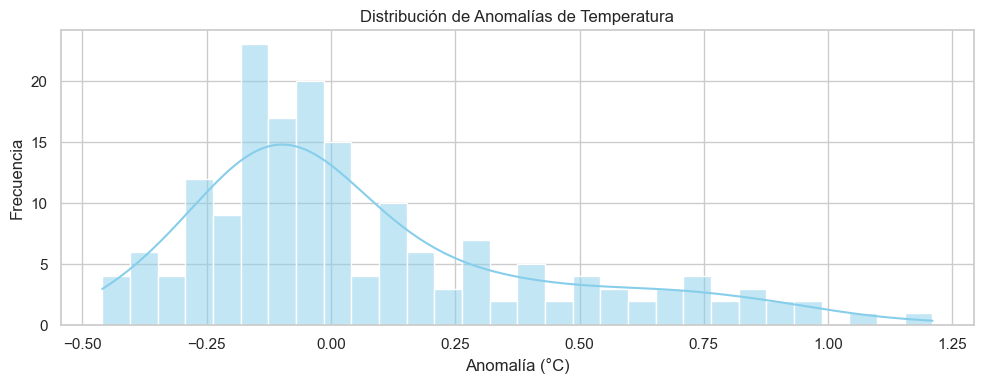

In [69]:
plt.figure(figsize=(10, 4))
sns.histplot(df_temp["Anomaly"], kde=True, color="skyblue", bins=30)
plt.title("Distribuci√≥n de Anomal√≠as de Temperatura")
plt.xlabel("Anomal√≠a (¬∞C)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


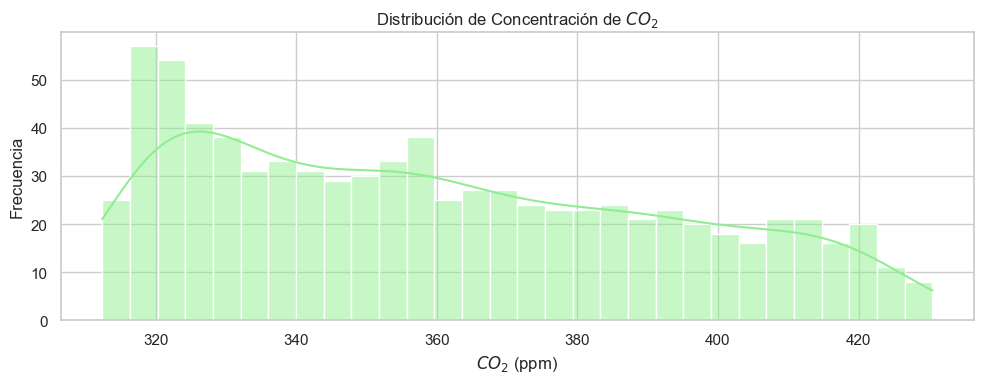

In [70]:
plt.figure(figsize=(10, 4))
sns.histplot(df_co2["average"], kde=True, color="lightgreen", bins=30)
plt.title("Distribuci√≥n de Concentraci√≥n de $CO_2$")
plt.xlabel("$CO_2$ (ppm)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [72]:
#Agrupar CO2 por a√±o (promedio anual)
df_co2_anual = df_co2.groupby("year")["average"].mean().reset_index()
df_co2_anual.rename(columns={"average": "co2_avg"}, inplace=True)

In [73]:
#Combinar con el dataset de temperatura
df_comb = pd.merge(df_temp, df_co2_anual, left_on="Year", right_on="year", how="inner")
df_comb.drop(columns=["year"], inplace=True)  # opcional, ya tenemos 'Year'
df_comb.head()


Year  Anomaly     co2_avg
0  1958     0.04  315.237000
1  1959     0.10  315.981667
2  1960    -0.01  316.908333
3  1961     0.13  317.643333
4  1962     0.03  318.453333

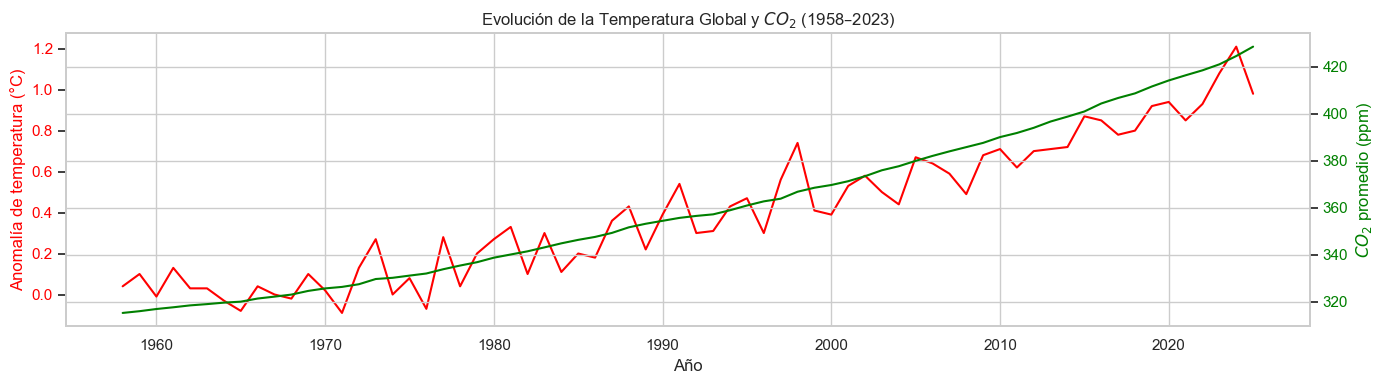

In [95]:
# Visualizaci√≥n de la comparaci√≥n de temperatura y CO‚ÇÇ
fig, ax1 = plt.subplots(figsize=(14, 4))

# Eje Y izquierdo: temperatura
color_temp = "red"
ax1.set_xlabel("A√±o")
ax1.set_ylabel("Anomal√≠a de temperatura (¬∞C)", color=color_temp)
ax1.plot(df_comb["Year"], df_comb["Anomaly"], color=color_temp, label="Temperatura")
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid(axis='y', visible=False)  # Oculta l√≠neas horizontales (eje Y)

# Eje Y derecho: CO‚ÇÇ
ax2 = ax1.twinx()
color_co2 = "green"
ax2.set_ylabel("$CO_2$ promedio (ppm)", color=color_co2)
ax2.plot(df_comb["Year"], df_comb["co2_avg"], color=color_co2, label="CO‚ÇÇ")
ax2.tick_params(axis='y', labelcolor=color_co2)

# T√≠tulo y dise√±o
plt.title("Evoluci√≥n de la Temperatura Global y $CO_2$ (1958‚Äì2023)")
fig.tight_layout()
plt.grid(True)
plt.show()

#usamos este metodo para que la escala de CO2 no eclipse a la anomal√≠a de temperatura aplastando la gr√°fica, por ello usarermos dos ejes y


In [ ]:
#Calcular la correlaci√≥n entre CO‚ÇÇ y anomal√≠a de temperatura
corr = df_comb["Anomaly"].corr(df_comb["co2_avg"])
print(f"üìä Correlaci√≥n entre CO‚ÇÇ y anomal√≠a de temperatura: {corr:.3f}")
#üîπ Si da >0.85, hay una fuerte correlaci√≥n positiva
#üî∏ Si da entre 0.5‚Äì0.8, es moderada pero consistente
#üîª Si es muy baja (<0.3), no hay correlaci√≥n clara

üìä Correlaci√≥n entre CO‚ÇÇ y anomal√≠a de temperatura: 0.957


In [ ]:
#Guardar el dataset combinado
df_comb.to_csv("../data/clean/df_comb.csv", index=False)

In [ ]:
#Creamos una columna decade para agrupar por d√©cadas para la data temperatura y CO2
df_temp['decade'] = (df_temp['Year'] // 10) * 10
df_co2['decade'] = (df_co2['year'] // 10) * 10
df_comb['decade'] = (df_comb['Year'] // 10) * 10


In [115]:
# Agrupar por d√©cada y calcular el promedio
temp_decade = df_temp.groupby('decade')['Anomaly'].mean().reset_index()
co2_decade = df_co2.groupby('decade')['average'].mean().reset_index()

In [116]:
# Unir ambos en un solo DataFrame para graficar juntos
df_decade = pd.merge(temp_decade, co2_decade, on='decade')


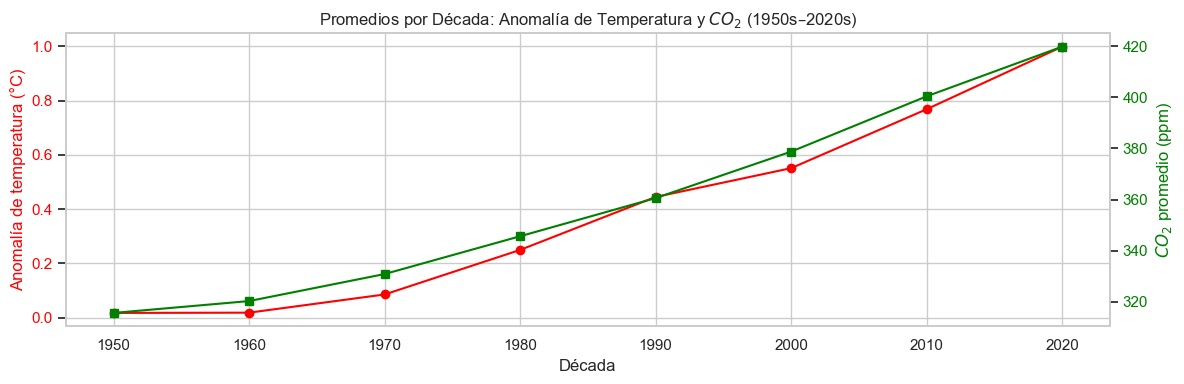

In [124]:
# Visualizaci√≥n de promedios por d√©cada
fig, ax1 = plt.subplots(figsize=(12, 4))

# Eje de temperatura
color1 = 'red'
ax1.set_xlabel('D√©cada')
ax1.set_ylabel('Anomal√≠a de temperatura (¬∞C)', color=color1)
ax1.plot(df_decade['decade'], df_decade['Anomaly'], marker='o', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Eje de CO2
ax2 = ax1.twinx()
color2 = 'green'
ax2.set_ylabel('$CO_2$ promedio (ppm)', color=color2)
ax2.plot(df_decade['decade'], df_decade['average'], marker='s', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Promedios por D√©cada: Anomal√≠a de Temperatura y $CO_2$ (1950s‚Äì2020s)")
plt.grid(False)
plt.tight_layout()
plt.show()


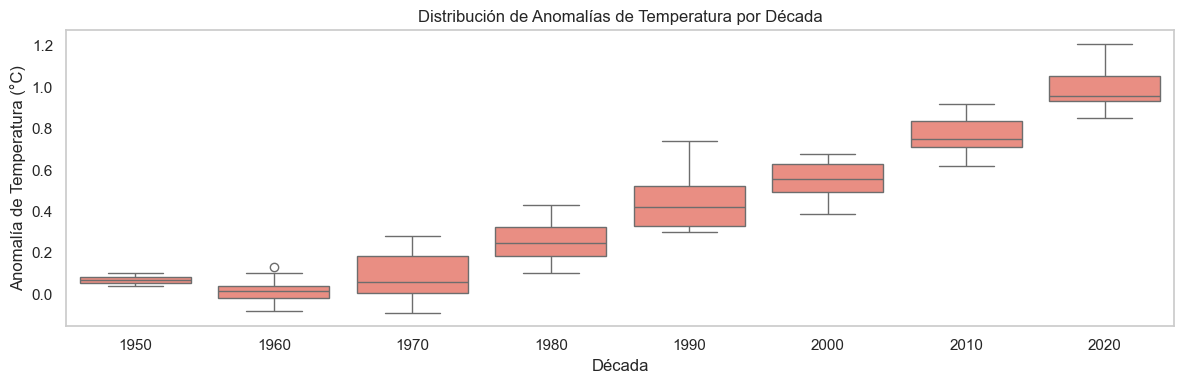

In [125]:
# Visualizaci√≥n boxplot de la distribuci√≥n de CO‚ÇÇ por d√©cada
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_comb, x='decade', y='Anomaly', color='salmon')
plt.title('Distribuci√≥n de Anomal√≠as de Temperatura por D√©cada')
plt.xlabel('D√©cada')
plt.ylabel('Anomal√≠a de Temperatura (¬∞C)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


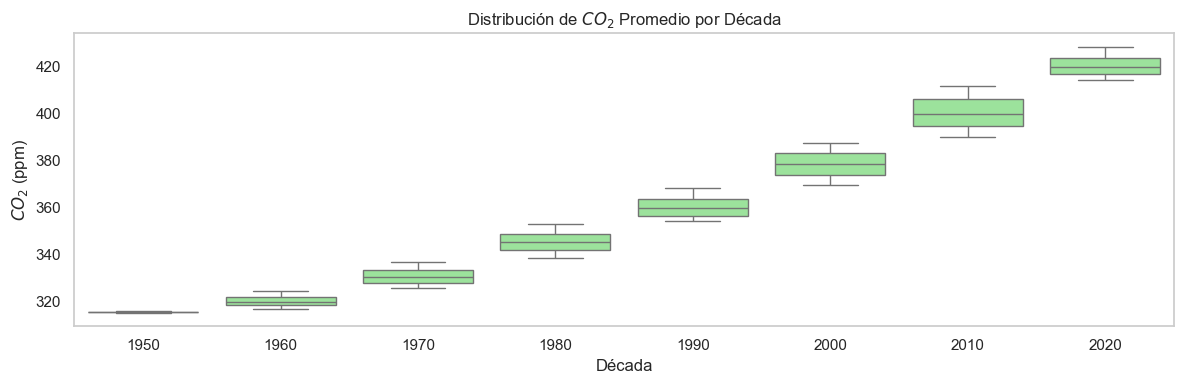

In [ ]:
# Visualizaci√≥n boxplot de la concentraci√≥n de CO‚ÇÇ por d√©cada
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_comb, x='decade', y='co2_avg', color='lightgreen')
plt.title('Distribuci√≥n de $CO_2$ Promedio por D√©cada')
plt.xlabel('D√©cada')
plt.ylabel('$CO_2$ (ppm)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


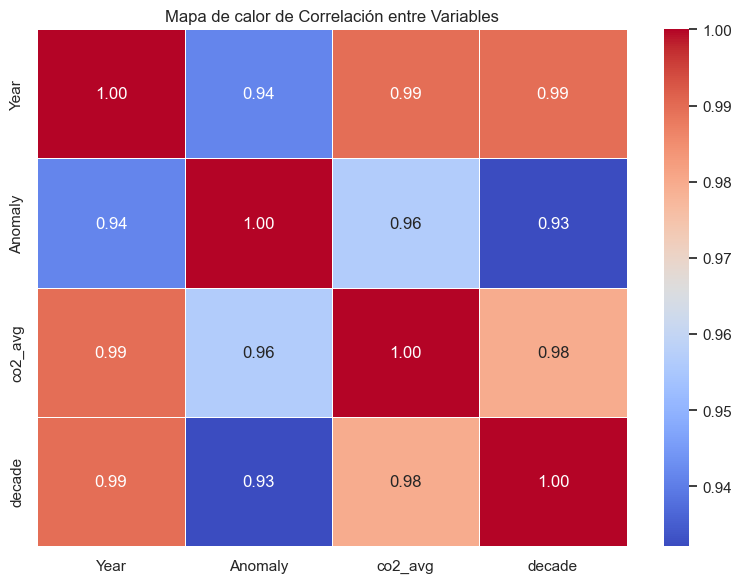

In [127]:
#Mapa de calor de correlaci√≥n entre variables (heatmap de correlation matrix)
#Calcular la matriz de correlaci√≥n
corr = df_comb.corr(numeric_only=True)

#Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de calor de Correlaci√≥n entre Variables")
plt.tight_layout()
plt.show()

In [133]:
#Detecci√≥n de outliers usando IQR (Interquartile Range)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers detectados en {column}: {len(outliers)}")

    return outliers[[column, 'Year']] #puedes incluir m√°s columnas si lo deseas

#Detectar outliers en ambas columnas
outliers_anomaly = detect_outliers_iqr(df_comb, 'Anomaly')
outliers_co2 = detect_outliers_iqr(df_comb, 'co2_avg')

Outliers detectados en Anomaly: 0
Outliers detectados en co2_avg: 0


In [ ]:
## 4. Limpieza b√°sica de los datos